### Exercise 5.1
**Why does the estimated value function jump up for the last two rows in the rear?**

Last two rows mean that player's sum is 20 or 21, so he will stick according to the policy. It is difficult for the dealer to get the same or better sum, because he always sticks when he has at least 17 points, so if he reaches 17-19/20 he always loses. If he has less than 17 points and hits, there is a high probability of exceeding 21 or reaching the losing range.

**Why does it drop for the whole last row on the left?**

Left row means that the dealer is showing an Ace, so he has a higher chance of not going bust and getting better result. If he exceeds 21, the Ace change its value from 11 to 1 and he doesn't automatically lose.

**Why are the frontmost values higher in the upper diagrams than in the lower?**

The upper diagram is for situation where the player has a usable Ace, which lowers his chances of going bust. If he exceeds 21, the Ace change its value from 11 to 1 and he can still play.

### Exercise 5.2

The result will be the same for every-visit MC, because there is no chance of reaching the same state twice during one episode. The player's sum is getting larger after each moves. The only exceptions is when he exceeds 21 with usable Ace, so he can reach the same sum twice in one game. But this is different state, in the first reach he has a usable Ace and in the second he doesn't.

### Exercise 5.3

The backup diagram for MC estimation of $q_\pi(s, a)$ is the same as for $v_\pi$, except that the first action is $a$ instead of some action done according to the policy $\pi$.

$$
S_t = s \rightarrow A_t = a \rightarrow S_{t+1} \rightarrow A_{t+1} = \pi(S_{t+1}) \rightarrow \cdots \rightarrow S_T
$$

### Exercise 5.4

#### Changes in the algorithm
* Initialization:
    * $Q(s, a) \leftarrow 0$ or all $s \in \mathcal{S}$, $a \in \mathcal{A}(s)$
    * $N(s,a) \leftarrow 0$ for all $s \in \mathcal{S}$, $a \in \mathcal{A}(s)$
* Inside the loop:
    * $N(S_t, A_t) \leftarrow N(S_t, A_t) + 1$
    * $Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \frac{1}{n} \left[ G - Q(S_t, A_t) \right]$


### Exercise 5.5
* $s_{nt}$ - non-terminal state
* $s_{t}$ - terminal state
* $a$ - action

Since we have only single non-terminal state and single action, there is only one possible policy, so
$$\pi = b$$
$$\rho_{t:T(t)-1} = 1 \text{ for all }t$$
So ordinary importance and weighted importance sampling are the same.

10-step episode looks like this:
$$
s_{nt}, a_t \rightarrow s_{nt}, a_t \rightarrow \cdots \rightarrow s_{nt}, a_t \rightarrow s_t
$$

$s_{nt}, a_t$ repeats 10 times

#### First-visit
* $t \in \{1\}$
* $G_1 = 10$
* $|\mathcal{T}(s)| = 1$
$$
V(s_{nt}) = \frac{10}{1} = 10
$$

#### Every-visit
* $t \in \{1, 2, \cdots, 10\}$
* $G_t \in \{10, 9, \cdots, 1\}$
* $|\mathcal{T}(s)| = 10$

$$
V(s_{nt}) = \frac{10 + 9 + \cdots + 1}{10} = 5.5
$$

### Exercise 5.6
$$
Q(s,a) = \frac{\sum_{t \in \mathcal{T}(s, a)} \rho_{t:T(t)-1}G_t}{\sum_{t \in \mathcal{T}(s, a)} \rho_{t:T(t)-1}}
$$
where $\mathcal{T}(s, a)$ is a set of first (or every) time-steps from each episode, where action $a$ was done in state $s$.

### Exercise 5.7

Since, the behaviour policy and the target policy are very different, probably we won't get any episode with high importance-sampling ratio among the first few episodes. On the other hand, there is a higher chance that one of these few episodes can have a very different return than the expected return with the target policy, and also slightly higher ratio than other episodes. The error increases at the beggining because the chance for collecting this type of episodes goes up. After generating more episodes, we will start getting episodes that are closer to the original policy and have high ratio. They will have larger weights than other episodes and will be more important, so the error will decrease.

### Exercise 5.8
Yes, the variance would still be infinite for every-visit method. For each possible episode length we would simply have more returns, but each return is equal to 1, so the expected return would still be 1. The sum describing expected scaled return would still add up to infinity.

### Exercise 5.9
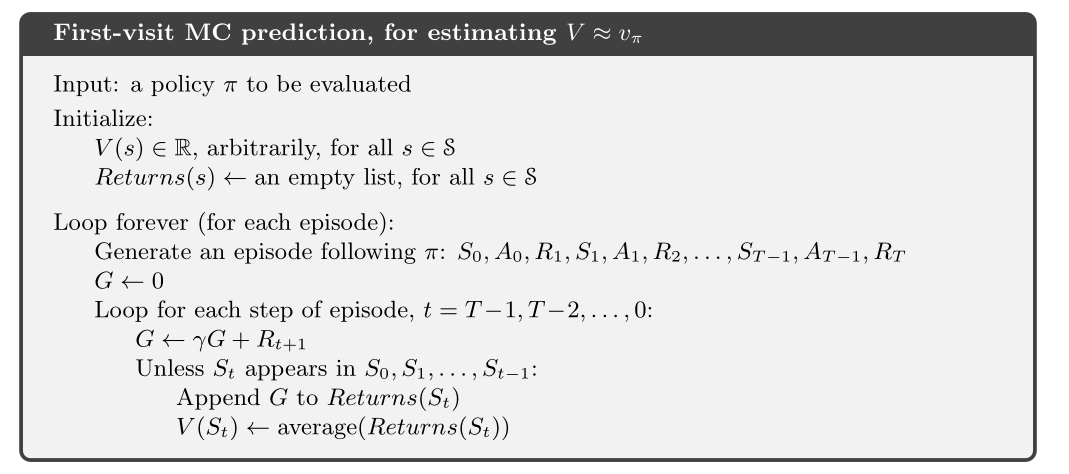

Input: a policy $\pi$ to be evaluated

Initialize: <br>
$~~~~V(s) \leftarrow 0$, for all $s \in \mathcal{S}$ <br>
$~~~~N(s) \leftarrow 0$, for all $s\in \mathcal{S}$

Loop forever (for each episode): <br>
$~~~~$ Generate an episode following $\pi$: $S_0, A_0, R_1, S_1, A_1, R_2 , \cdots, S_{T-1}, A_{T-1}, R_T$ <br>
$~~~~~G \leftarrow 0$ <br>
$~~~~~$ Loop for each step of episode, $t = T-1, T-2, \cdots, 0$: <br>
$~~~~~~~~~G \leftarrow G + R_{t+1}$ <br>
$~~~~~~~~$ Unless $S_t$ appears in $S0, S1, ... , S_{t-1}$: <br>
$~~~~~~~~~~~N(S_t) \leftarrow N(S_t) + 1$ <br>
$~~~~~~~~~~~V(S_t) \leftarrow \frac{1}{N(S_t)} [G - V(S_t)]$

### Exercise 5.10
$$
V_{n+1} = \frac{\sum_{k=1}^n W_k G_k}{C_n}
$$
so
$$
C_nV_{n+1} = \sum_{k=1}^{n-1} W_k G_k + W_nG_n = C_{n-1}V_n + W_nG_n = (C_n-W_n)V_n + W_nG_n = C_nV_n - W_nV_n + W_nG_n = \\
= C_nV_n + W_n(G_n-V_n)
$$
Therefore
$$
V_{n+1} = \frac{C_nV_n}{C_n} + \frac{W_n}{C_n}(G_n - V_n)\\ = V_n + \frac{W_n}{C_n}(G_n-V_n)
$$